# Predicting Client Loan Defaulting

In this case we are going to predict if a person will default on a loan (not be able to pay it) based on various features.

## Load data file

Load the data file (credit.csv)

In [1]:
# import libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\ivane\Desktop\ACI-2\data\credit.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [2]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
df.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


## Data cleaning

Check for any missing data, if there is any perform corrective measures.

In [4]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

## Plot boxplots for data exploration

Plot a histogram for each feature making sure to how the amount how much people have defaulted or not.

In [7]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [5]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [15]:
categorical = ['checking_balance', 'credit_history', 'employment_duration', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']

numerical = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age',
        'existing_loans_count', 'dependents']

target = 'default'

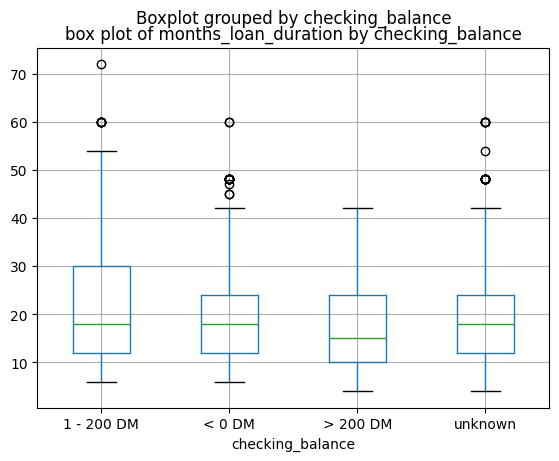

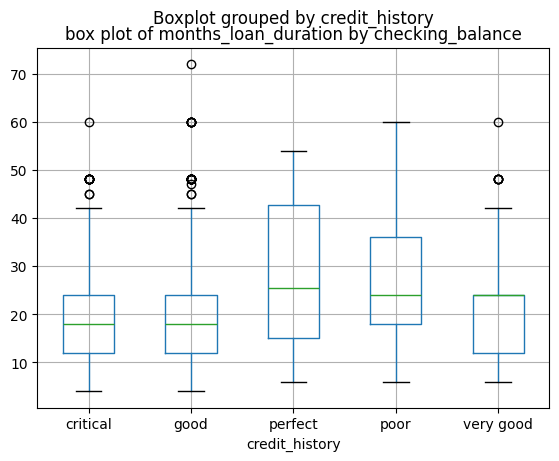

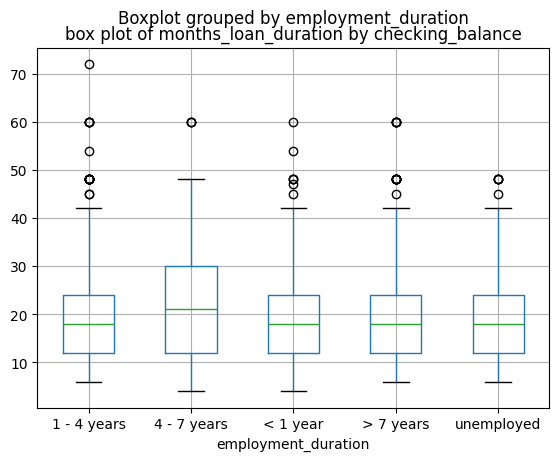

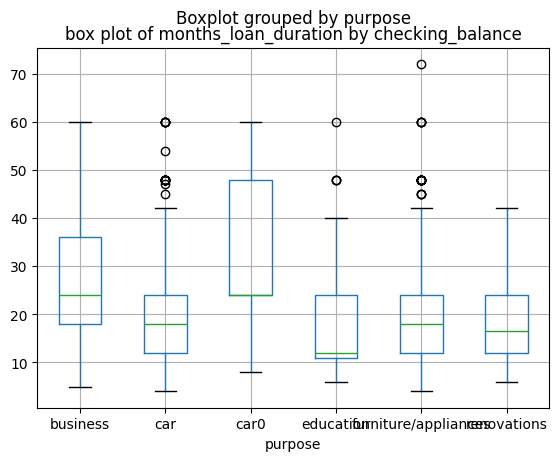

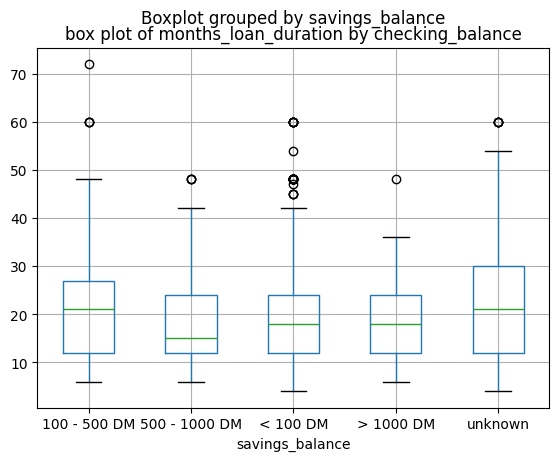

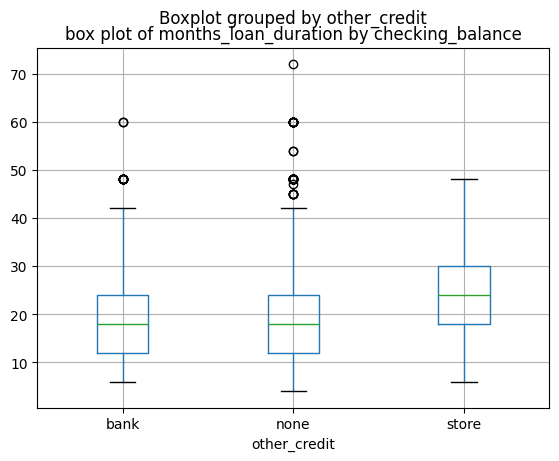

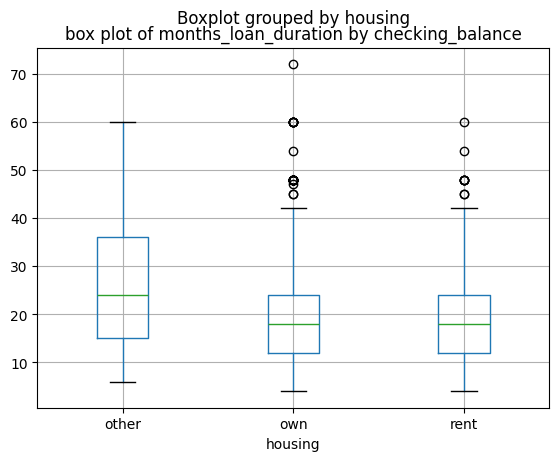

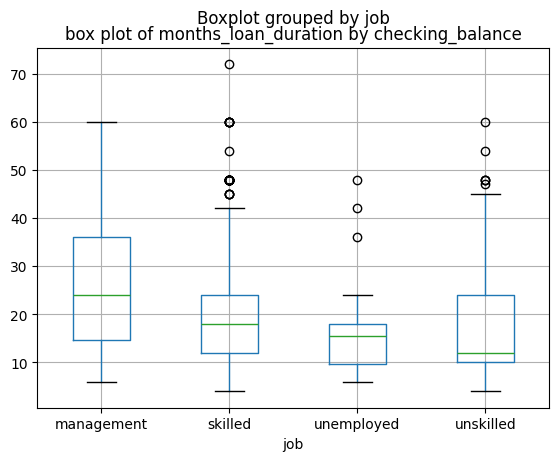

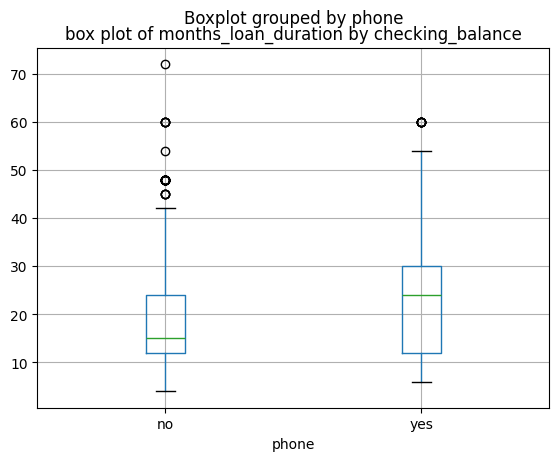

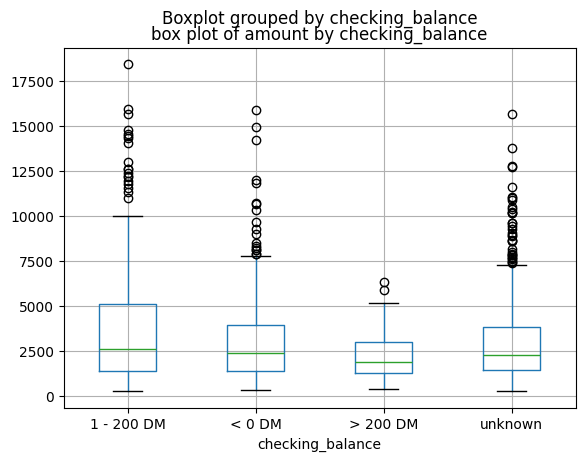

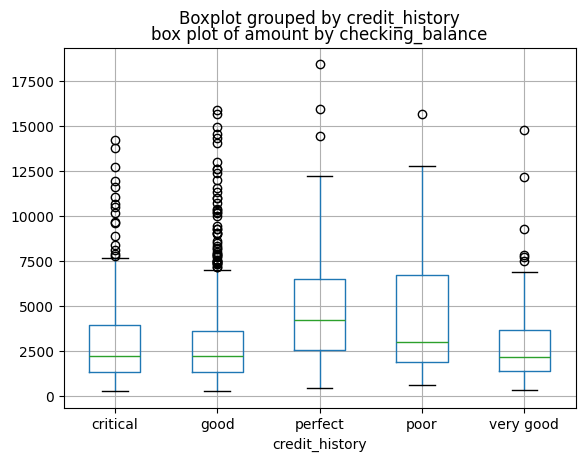

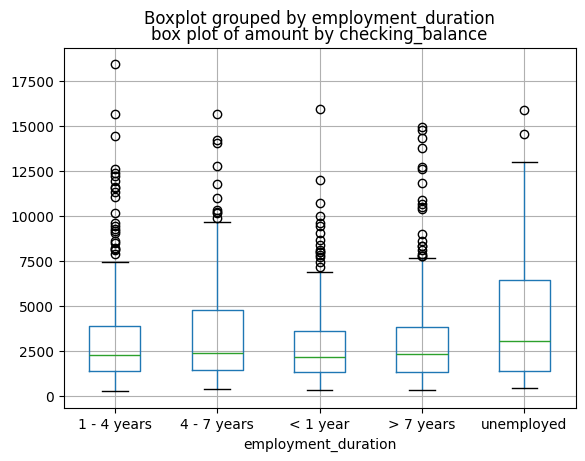

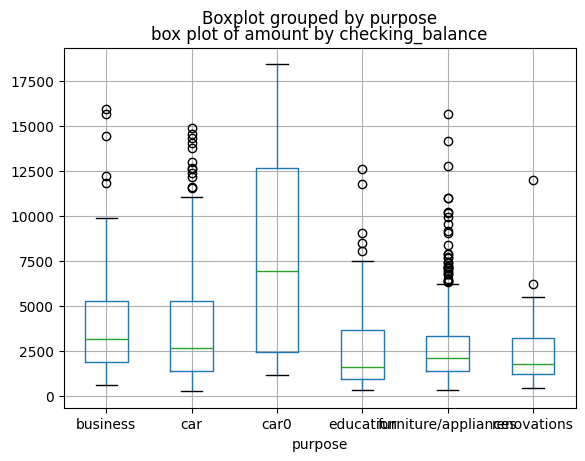

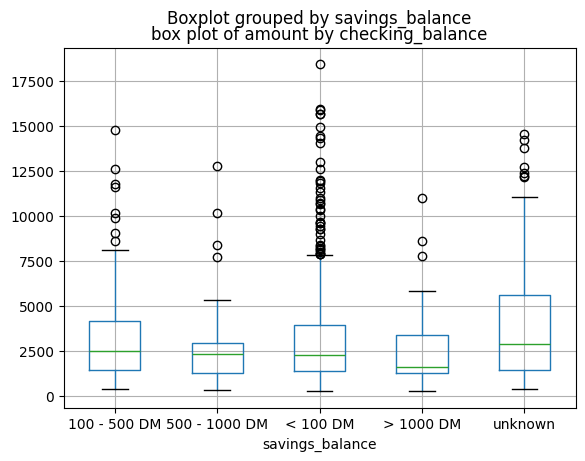

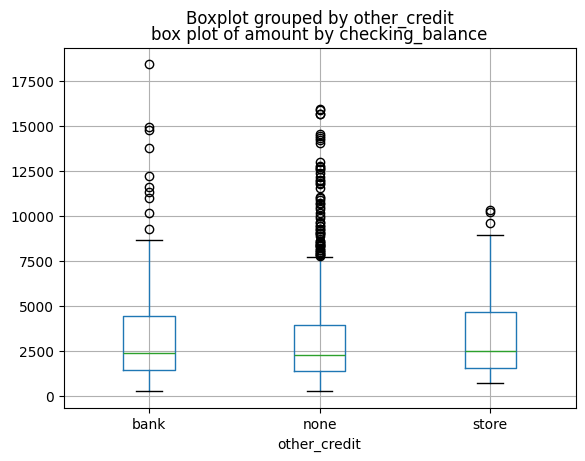

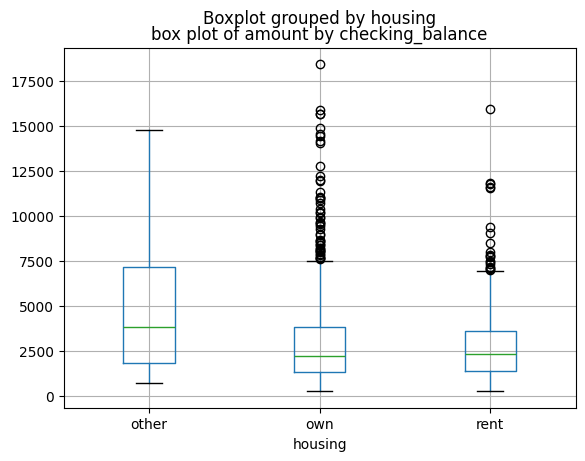

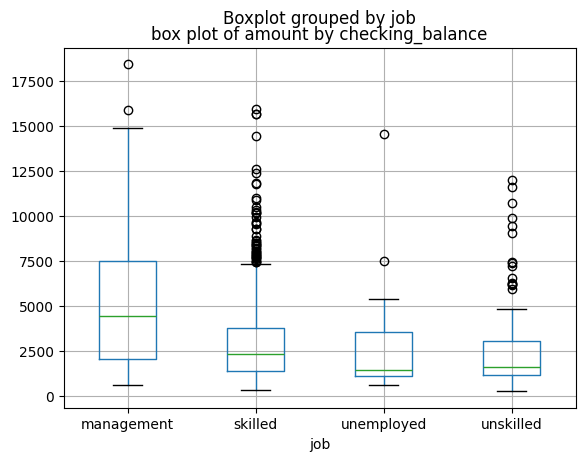

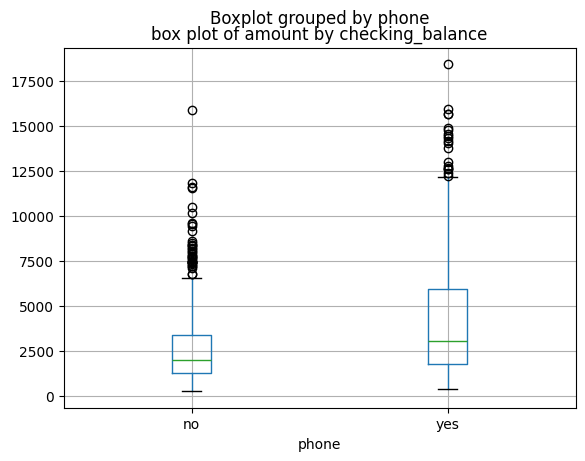

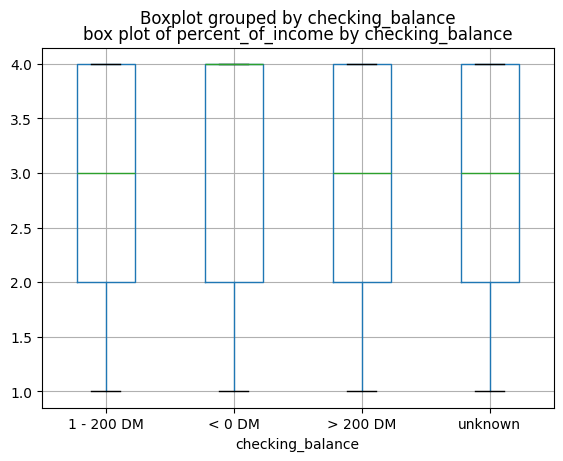

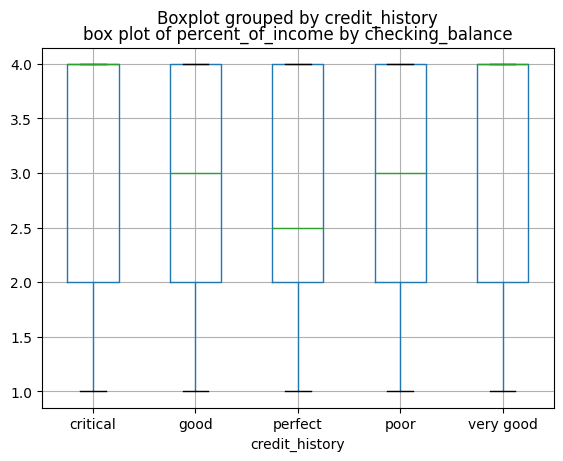

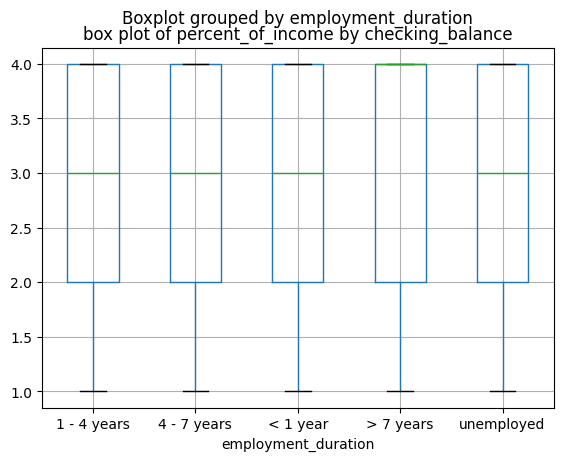

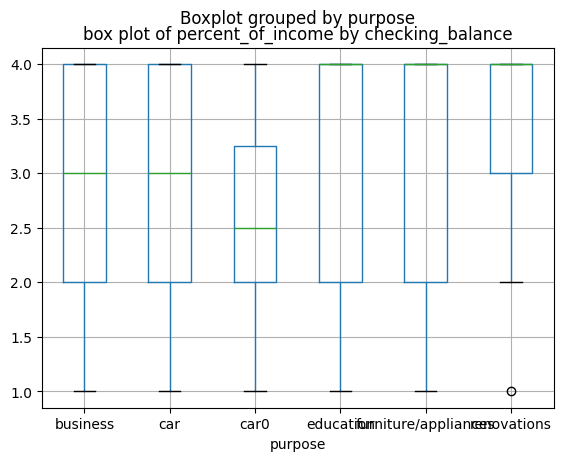

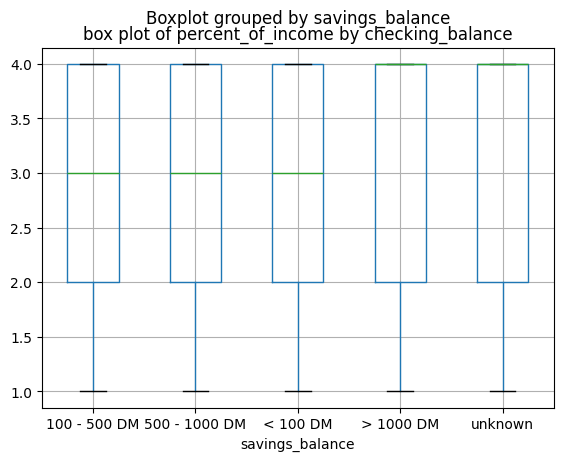

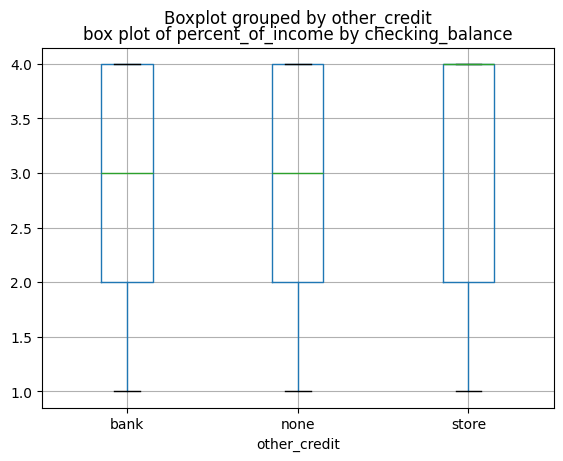

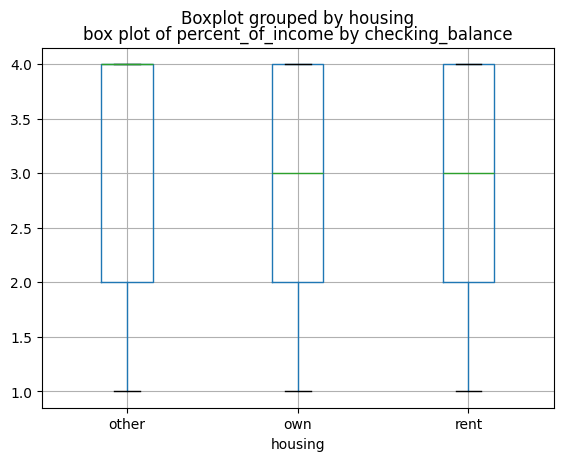

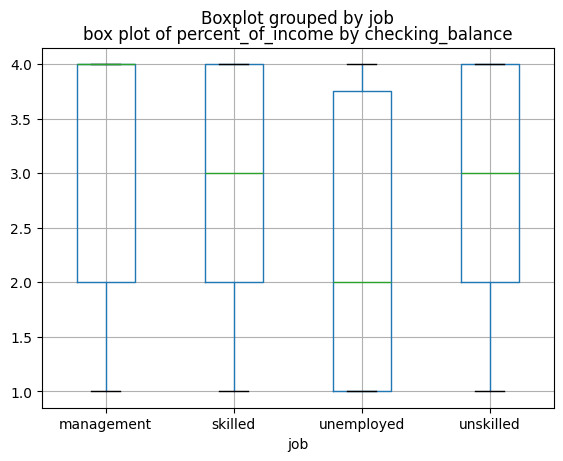

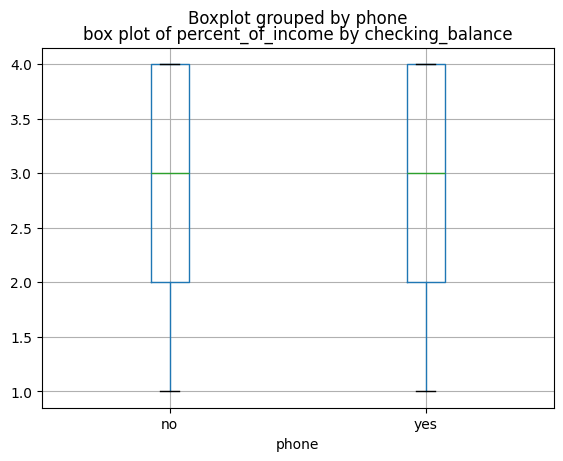

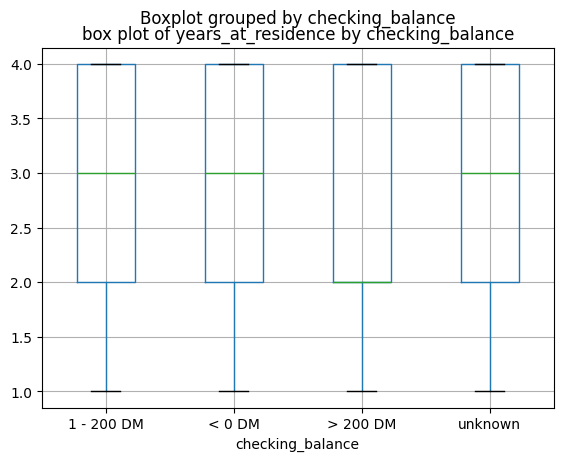

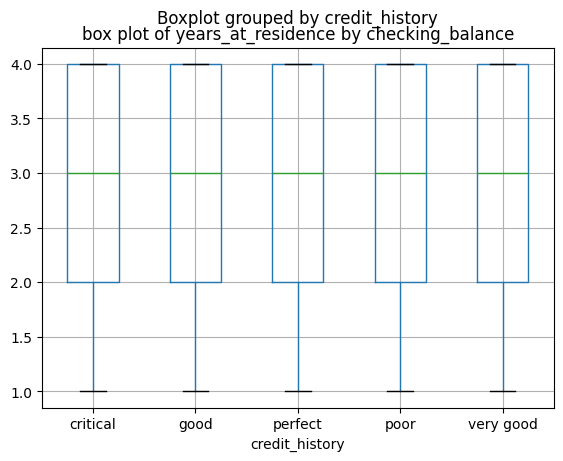

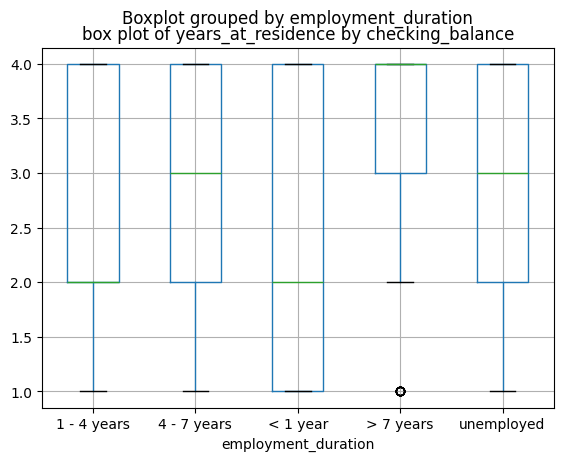

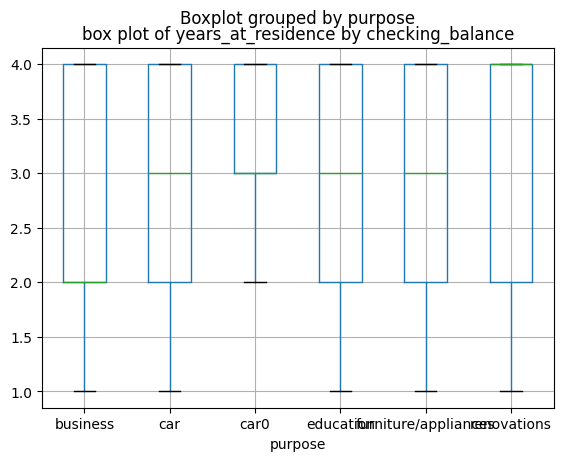

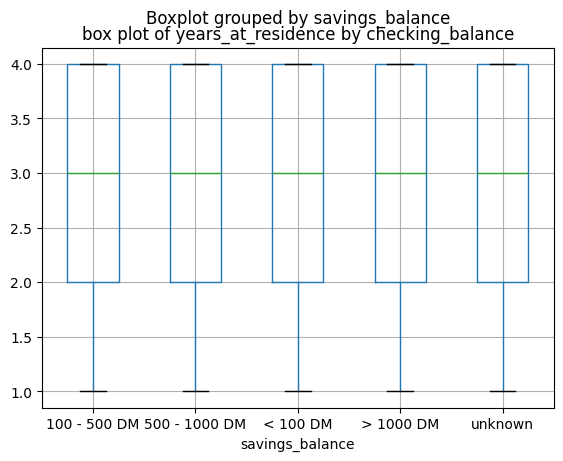

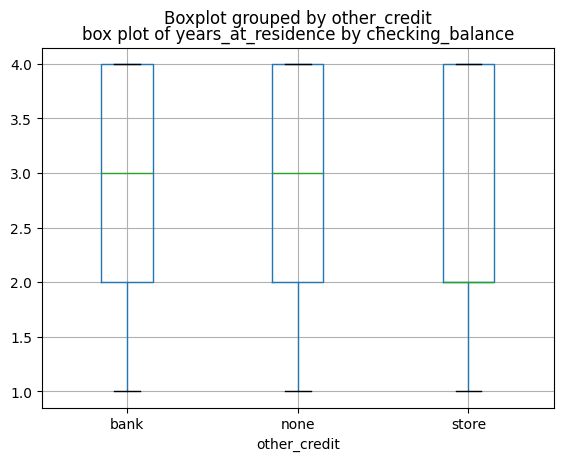

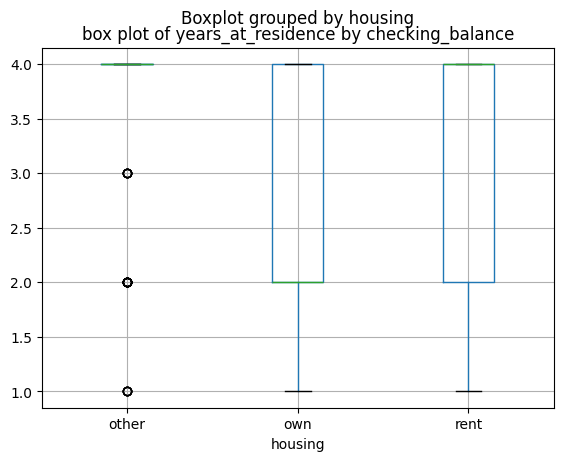

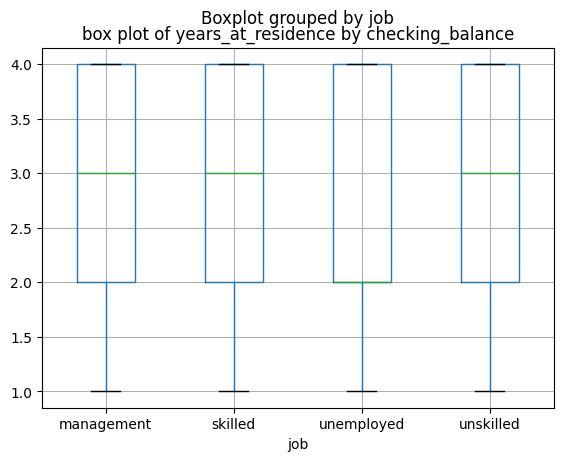

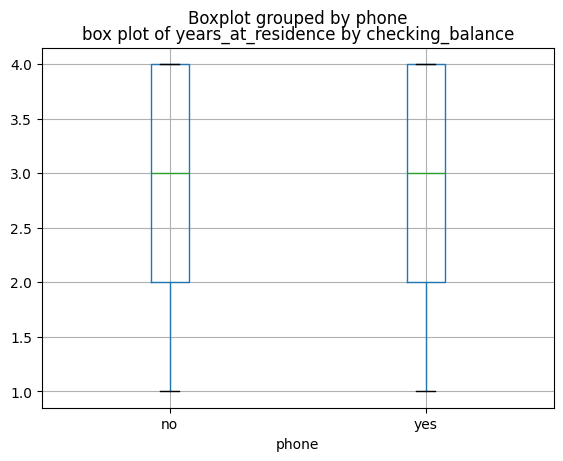

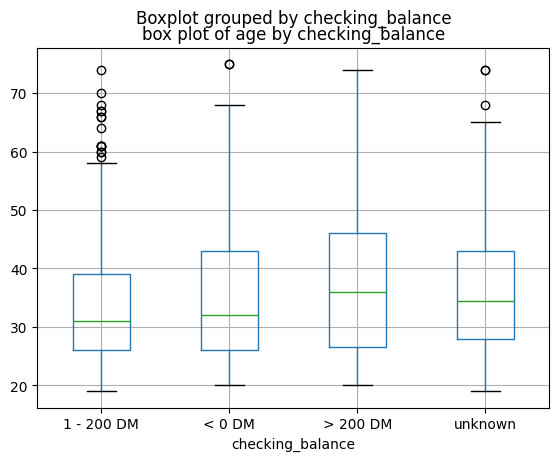

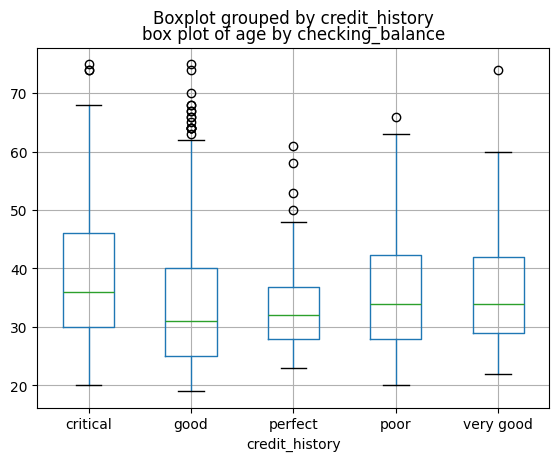

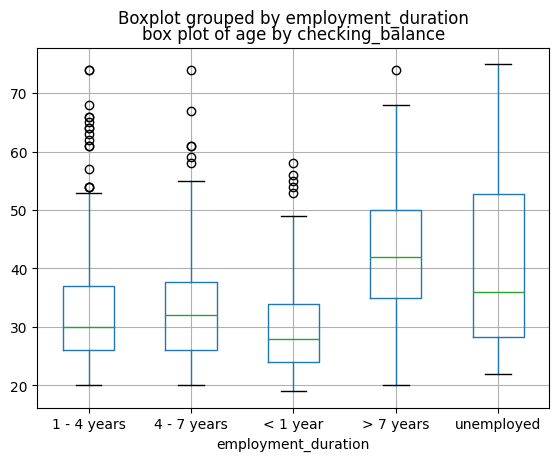

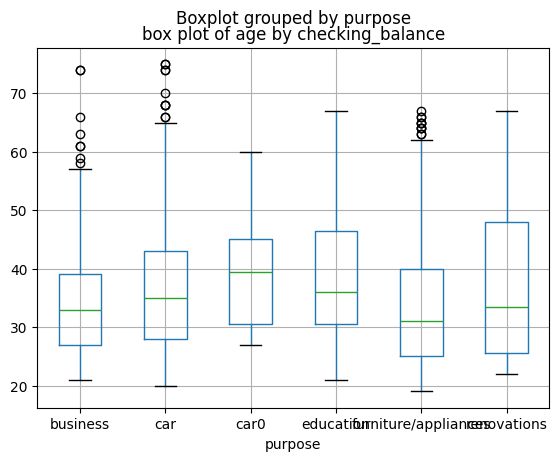

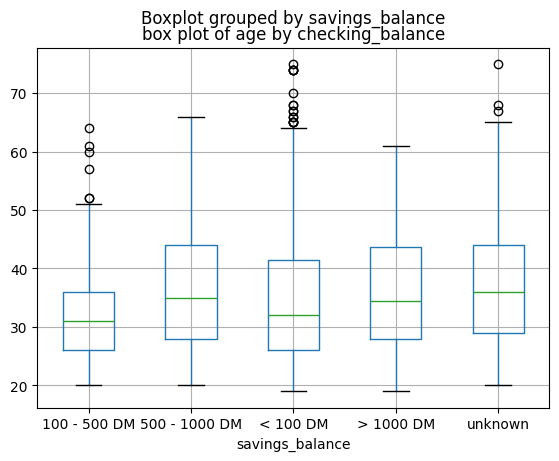

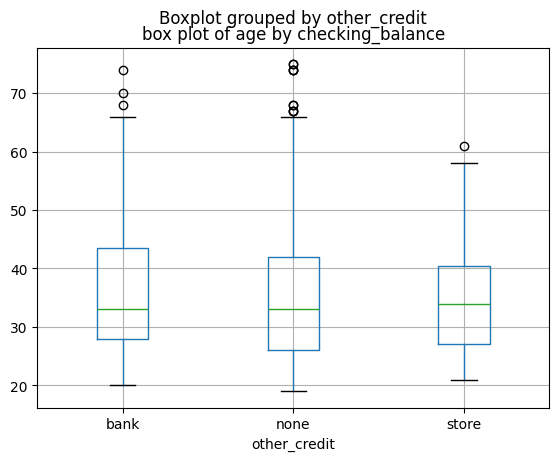

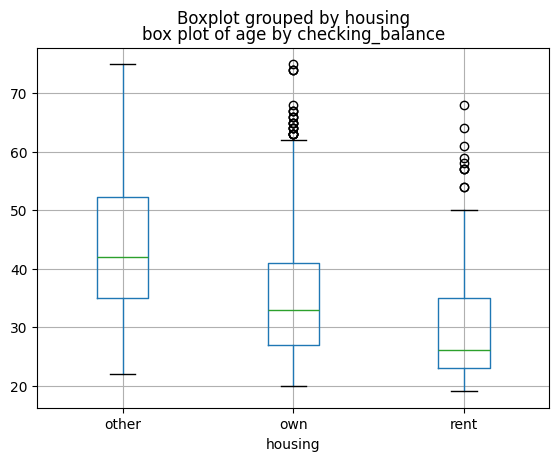

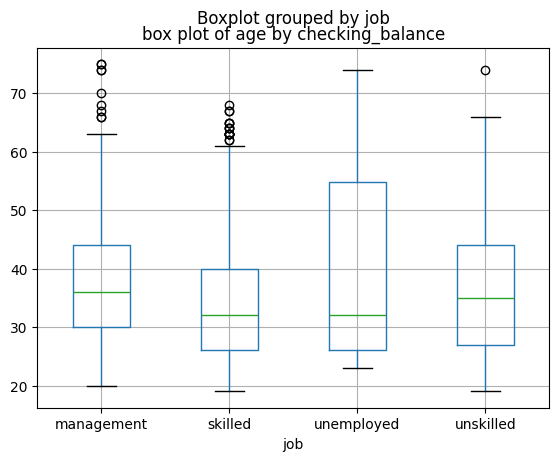

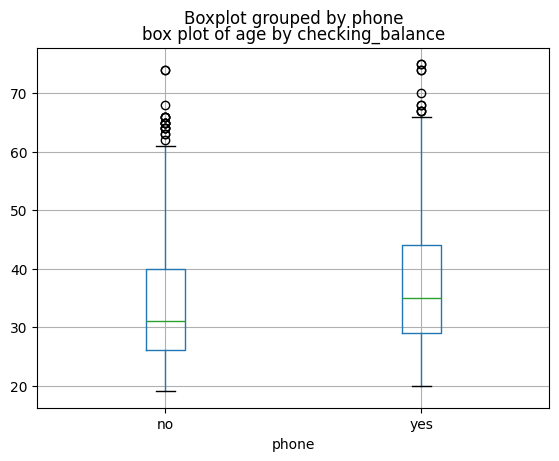

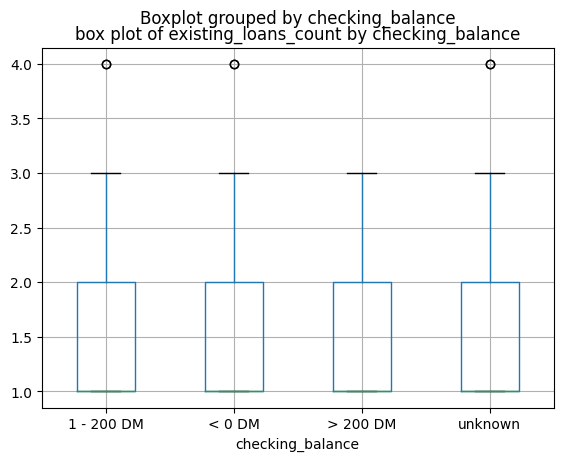

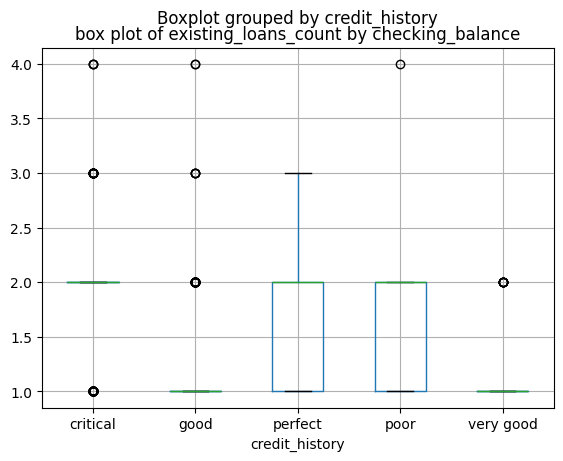

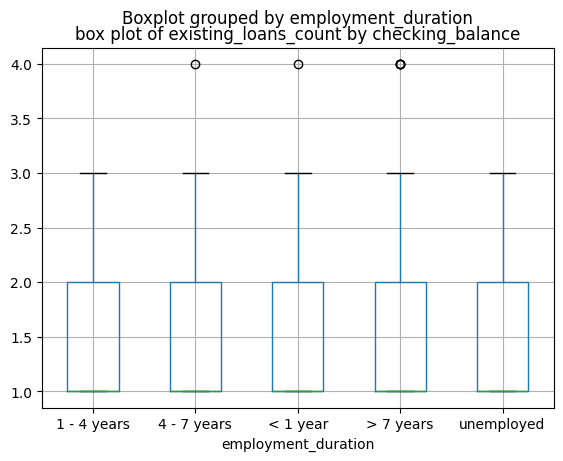

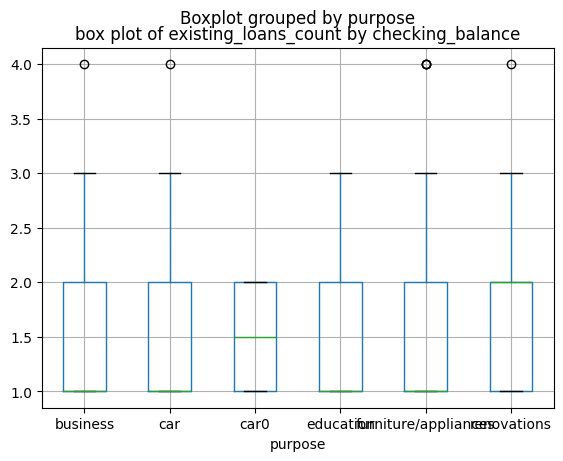

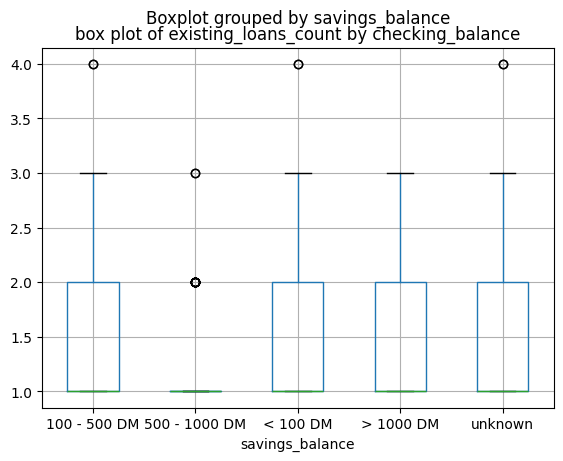

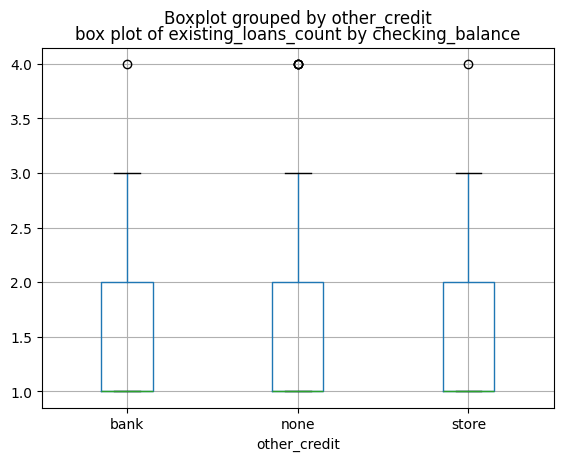

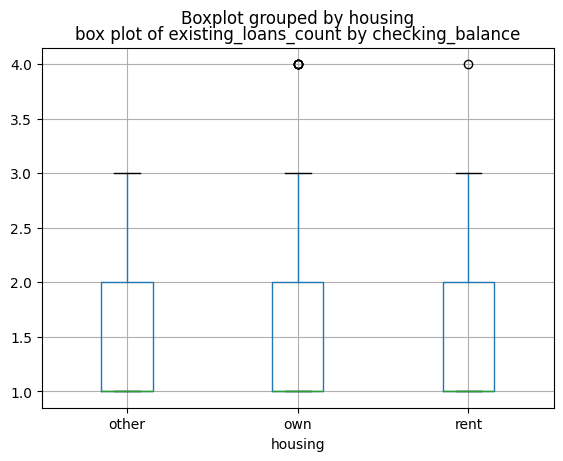

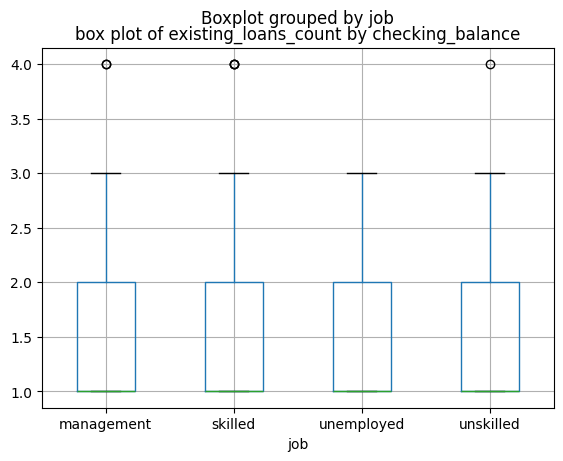

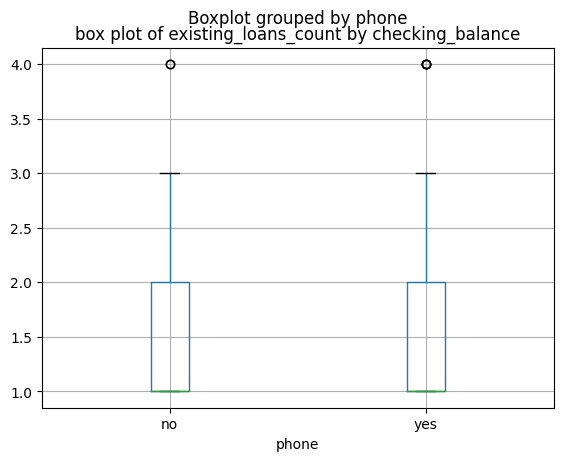

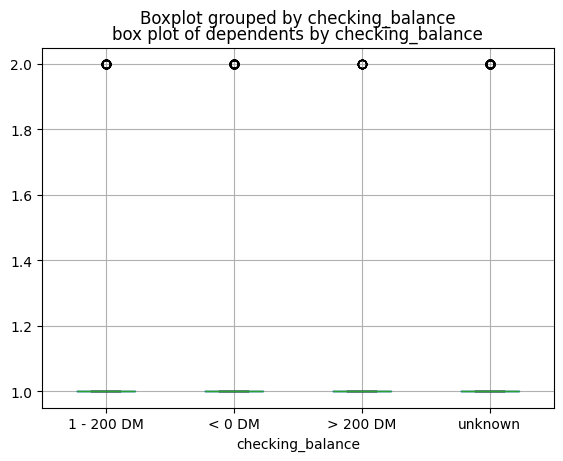

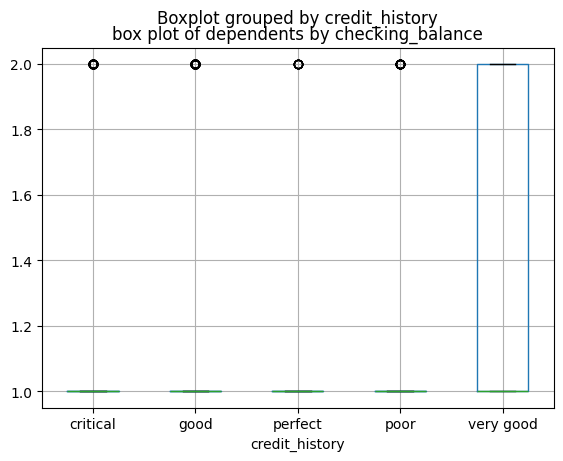

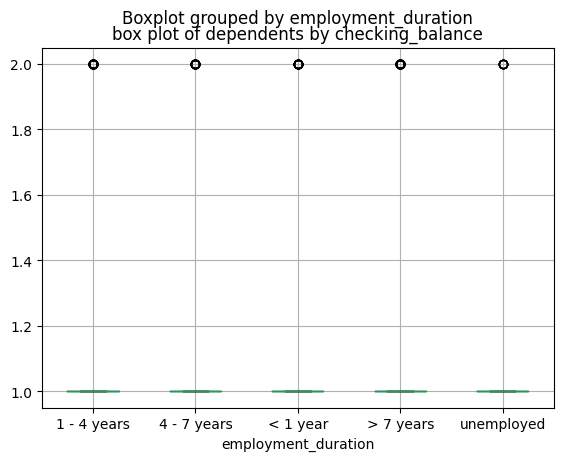

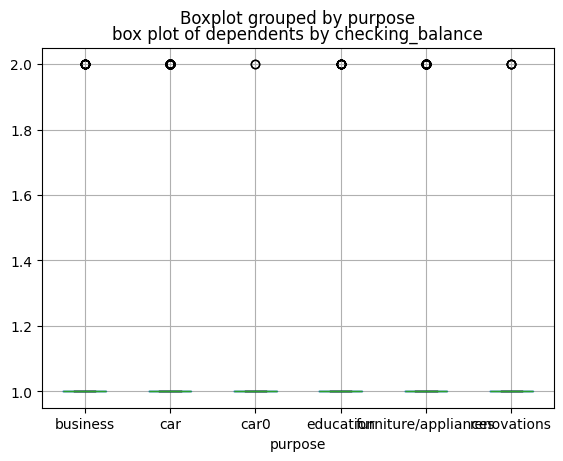

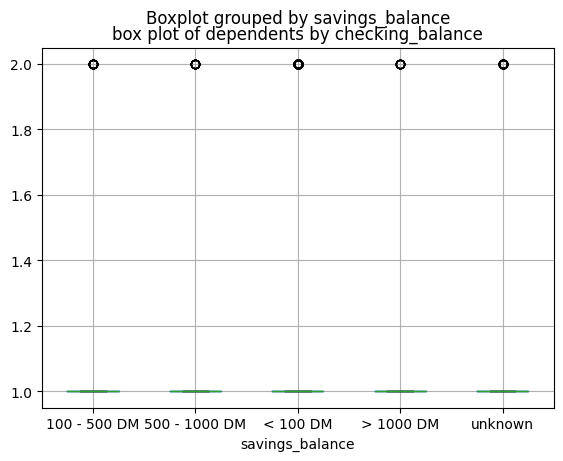

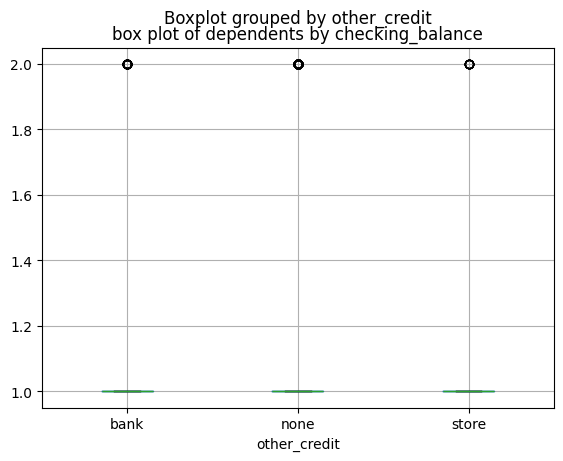

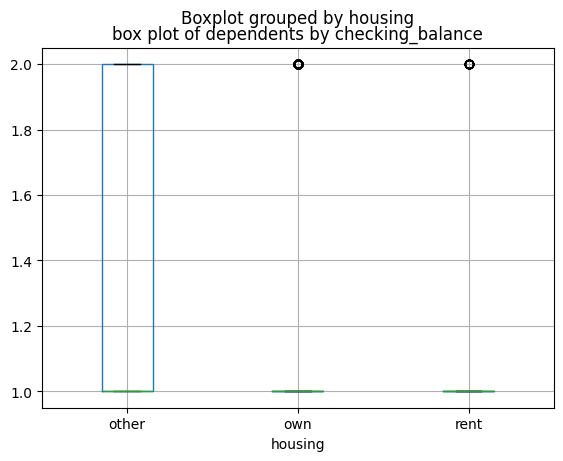

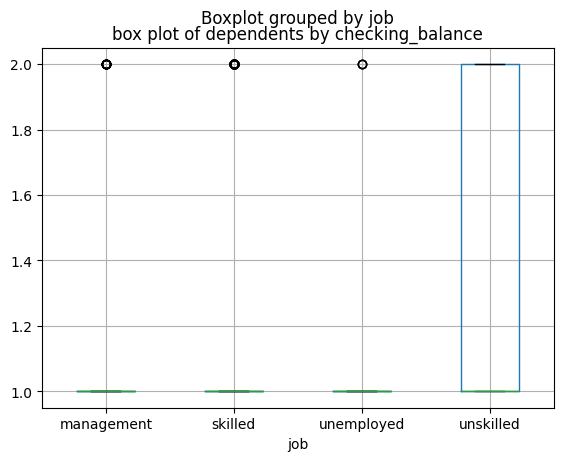

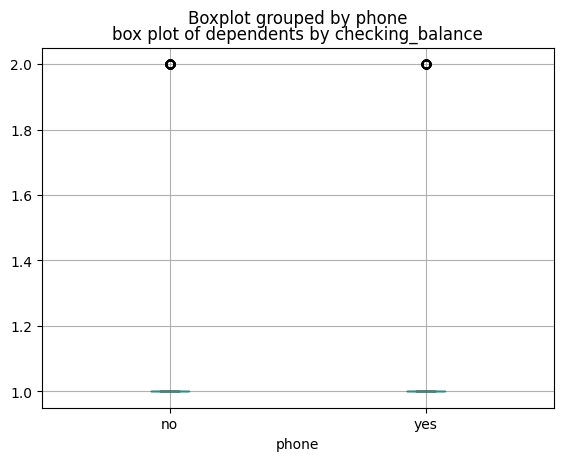

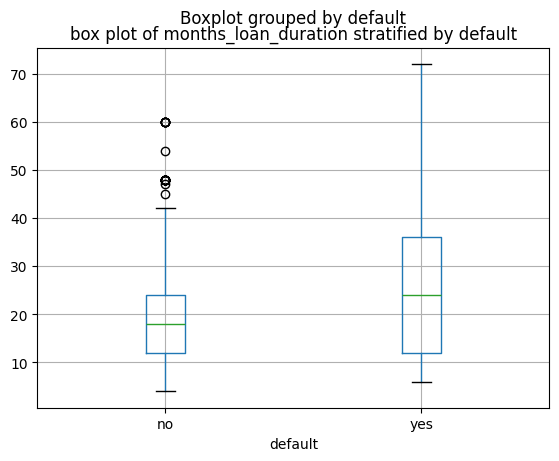

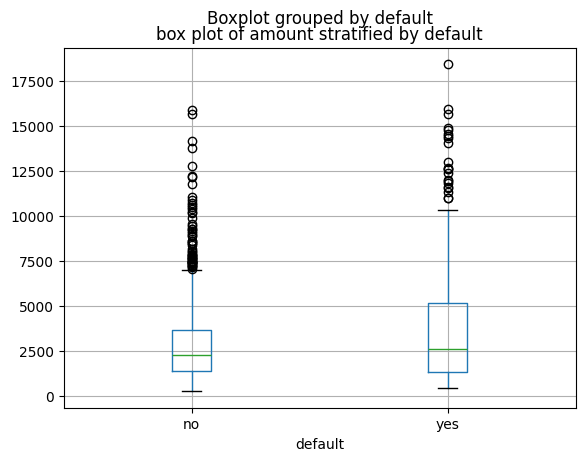

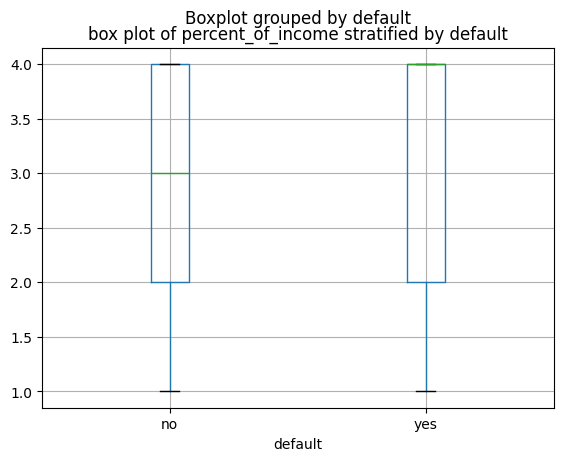

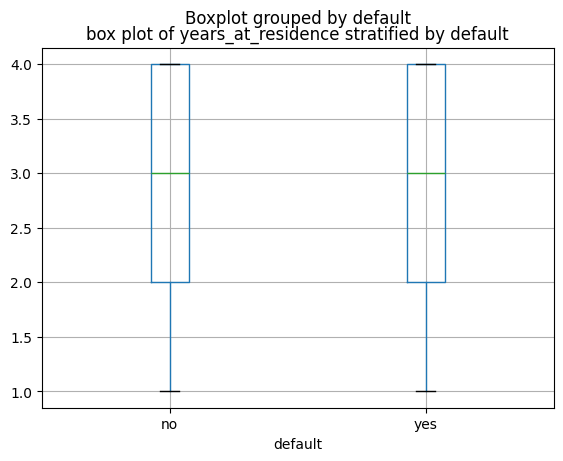

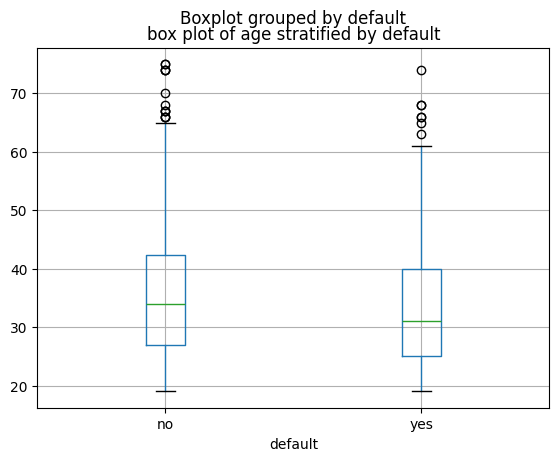

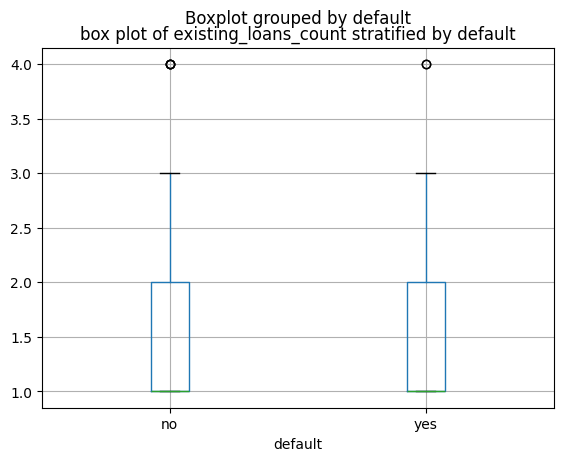

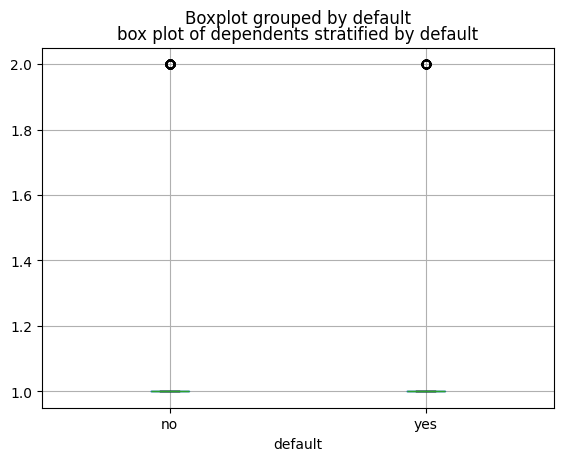

In [16]:
for i in numerical:
    for j in categorical:
        df.boxplot(column=i, by=j)
        plt.title(f'box plot of {i} by {feature}')
        plt.show()
        
for i in numerical:
    df.boxplot(column=i, by=target)
    plt.title(f'box plot of {i} stratified by {target}')
    plt.show()

# Data Manipulation

In this case we will be using a RandomForestClassifier, and this model does not accept strings, so we must change those to numerical values. 

One way of doing it would be:
- Create array that stores the names of the columns that have labels
- Use scikit-learn LabelEncoder to replace existing data with encoded data by looping through previous array

In [17]:
# one-hot encoding 
features = df.columns.to_list()

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in categorical:
    df[feature] = label_encoder.fit_transform(df[feature])
    
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,no
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,yes
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,no
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,no
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,yes


## Split Data

Split the data with a ratio that you see fit. Make sure to set random_state.

In [19]:
features.remove(target)

In [21]:
from sklearn.model_selection import train_test_split

X, y = df[features].values , df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape[0], X_test.shape[0])

700 300


## Train Model and Predict 

You are to train the model using a RandomForestClassifier. Then use the model to predict the labels.

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

predictions = model.predict(X_test)

## Generate a Classification Report

Generate the precision, recall, and F1 Score, and write down your observations.

In [23]:
from sklearn.metrics import accuracy_score, classification_report

print(f'accuracy: {accuracy_score(y_test, predictions)}')

print(classification_report(y_test, predictions))

accuracy: 0.7633333333333333
              precision    recall  f1-score   support

          no       0.79      0.90      0.84       210
         yes       0.66      0.43      0.52        90

    accuracy                           0.76       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.75      0.76      0.75       300



## Generate a Confusion Matrix

Generate a confusion matrix and write down your observations.

In [24]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[190  20]
 [ 51  39]]


## Generate an AUC score

Generate the AUC score and write down your observations.

In [28]:
from sklearn.metrics import roc_auc_score

prob = model.predict_proba(X_test)
prob

array([[0.92, 0.08],
       [0.62, 0.38],
       [0.62, 0.38],
       [0.91, 0.09],
       [0.79, 0.21],
       [0.88, 0.12],
       [0.96, 0.04],
       [0.87, 0.13],
       [0.61, 0.39],
       [0.43, 0.57],
       [0.4 , 0.6 ],
       [0.48, 0.52],
       [0.99, 0.01],
       [0.53, 0.47],
       [0.44, 0.56],
       [0.45, 0.55],
       [0.68, 0.32],
       [0.48, 0.52],
       [0.99, 0.01],
       [0.59, 0.41],
       [0.46, 0.54],
       [0.84, 0.16],
       [0.98, 0.02],
       [0.77, 0.23],
       [0.76, 0.24],
       [0.71, 0.29],
       [0.44, 0.56],
       [0.69, 0.31],
       [0.88, 0.12],
       [0.46, 0.54],
       [0.94, 0.06],
       [0.51, 0.49],
       [0.8 , 0.2 ],
       [0.87, 0.13],
       [0.59, 0.41],
       [0.66, 0.34],
       [0.76, 0.24],
       [0.93, 0.07],
       [0.82, 0.18],
       [0.87, 0.13],
       [0.69, 0.31],
       [0.59, 0.41],
       [0.98, 0.02],
       [0.61, 0.39],
       [0.91, 0.09],
       [0.44, 0.56],
       [0.94, 0.06],
       [0.65,

In [29]:
print('Average AUC: ', roc_auc_score(y_test, prob[:,1]))

Average AUC:  0.7772486772486773


# Feature Importance

You can also use the feature_importances_ of the model to get which features have the most impact. 

In [31]:
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importance)

amount                  0.159965
checking_balance        0.127459
age                     0.118093
months_loan_duration    0.101801
credit_history          0.060063
savings_balance         0.054327
employment_duration     0.054129
percent_of_income       0.050028
years_at_residence      0.049230
purpose                 0.049144
other_credit            0.042374
job                     0.037585
housing                 0.034663
existing_loans_count    0.024635
phone                   0.020853
dependents              0.015651
dtype: float64
